<a href="https://colab.research.google.com/github/AshKatzEm/esrb_ratings_analysis_project/blob/main/ESRB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load relevant libraries
import numpy as np
import pandas as pd

https://www.kaggle.com/code/artemborzenko/analyze-the-esrb-rating-of-games-dataset

Resource that deals with the same data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:


# Use inline so our visualizations display in notebook
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split


# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier


# Import our Random Forest
from sklearn.ensemble import RandomForestClassifier


# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz

Need to load the file manually from the computer each time

By uploading to session storage

In [ ]:
df = pd.read_csv("/Video_games_esrb_rating.csv")
# AK: I added a slash, perhaps that's a windows requirement, upload the data ouside of the folders

FileNotFoundError: ignored

In [ ]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [ ]:
df[df["no_descriptors"] == 1].esrb_rating.value_counts()

E     266
T      37
ET     15
M       4
Name: esrb_rating, dtype: int64

Removing titles with no descriptors because there is no way to classify them.

Might also want to remove titles with less than a certain number of descriptors.

Should probably add a feature which is number of descriptors.

In [ ]:
df = df[df["no_descriptors"] == 0]

The data is already beoken up into 2 csvs

One for training and the other for testing

Kind of annoying but I could append one to the other and split them myself

In [ ]:
df_test = pd.read_csv("/test_esrb.csv")

In [ ]:
df_test.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Still Time,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,Surf World Series,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,The Metronomicon: Slay the Dance Floor,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,T
3,Windjammers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,Rock of Ages 2: Bigger and Boulder,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,ET


In [ ]:
df.shape

(1573, 34)

In [ ]:
df_test.shape

(500, 34)

In [ ]:
df.describe(include="all")

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
count,1573,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573
unique,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,Subnautica: Below Zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,652
mean,NaN,0.465989,0.054037,0.011443,0.263191,0.150032,0.022886,0.061030,0.038779,0.262556,...,0.041322,0.069294,0.079466,0.139860,0.043229,0.139224,0.017800,0.019072,0.075652,NaN
std,NaN,0.499001,0.226162,0.106392,0.440505,0.357216,0.149588,0.239461,0.193130,0.440163,...,0.199098,0.254035,0.270551,0.346952,0.203438,0.346291,0.132267,0.136821,0.264524,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


Because almost all of the data is of boolean type describing doesn't do anything


| Feature_name | data_type |	description_of_data |	response_values |
|---|---|---|---|
|"title" |string | Name of the game |____ |
| "console" |	int	| The console on which the game was released |	0 = PS4,1 = PS4 & Xbox_one |
|"alcohol_reference" |	int	| Reference to and/or images of alcoholic beverages |	0 = no, 1 = yes |
| "animated_blood" | int | Discolored and/or unrealistic depictions of blood | 0 = no, 1 = yes
| "blood" |	int	| Depictions of blood | 0 = no, 1 = yes |
| "blood_and_gore"	| int |	Depictions of blood or the mutilation of body parts |	0 = no, 1 = yes |
|"cartoon_violence"	| int |	Violent actions involving cartoon-like situations and characters| May include violence where a character is unharmed after the action has been inflicted |	0 = no, 1 = yes |
|"crude_humor" | int	| Depictions or dialogue involving vulgar antics, including "bathroom" humor | 0 = no, 1 = yes |
|"drug_reference"|	int	| Reference to and/or images of illegal drugs|	0 = no, 1 = yes|
|"fantasy_violence"|	int	|Violent actions of a fantasy nature, involving human or non-human characters in situations easily distinguishable from real life| 0 = no, 1 = yes |
|"intense_violence"	| int |	Graphic and realistic-looking depictions of physical conflict| May involve extreme and/or realistic blood, gore, weapons, and depictions of human injury and death|	0 = no, 1 = yes|
|"language"	| int |	Moderate use of profanity|	0 = no, 1 = yes|
|"lyrics"	| int |	References to profanity, sexuality, violence, alcohol, or drug use in music|	0 = no, 1 = yes |
|"mature_humor"	| int |	Depictions or dialogue involving "adult" humor, including sexual references|	0 = no, 1 = yes |
|"mild_blood"	| int |	Some blood|	0 = no, 1 = yes |
|"mild_cartoon_violence"	| int |	Some violent actions involving cartoon|	0 = no, 1 = yes |
|"mild_fantasy_violence"	| int |	Some violent actions of a fantasy nature|	0 = no, 1 = yes |
|"mild_language"	| int |	Mild to moderate use of profanity|	0 = no, 1 = yes |
|"mild_lyrics"	| int |	Mild References to profanity, sexuality, violence, alcohol, or drug use in music|	0 = no, 1 = yes |
|mild_suggestive_themes"	| int |	some provocative references or materials	0 = no, 1 = yes |
|"mild_violence"	| int |	Some scenes involving aggressive conflict|	0 = no, 1 = yes |
|"no_descriptors"	| int |	No content descriptors|	0 = no, 1 = yes |
|"nudity"	| int |	Graphic or prolonged depictions of nudity|	0 = no, 1 = yes |
|"partial_nudity"	| int |	Brief and/or mild depictions of nudity|	0 = no, 1 = yes |
|"sexual_content"	| int |	Non-explicit depictions of sexual behavior, possibly including partial nudity|	0 = no, 1 = yes |
|"sexual_themes"	| int |	References to sex or sexuality|	0 = no, 1 = yes |
|"simulated_gambling"	| int |	Player can gamble without betting or wagering real cash or currency|	0 = no, 1 = yes |
|"strong_language"	| int |	Explicit and/or frequent use of profanity|	0 = no, 1 = yes |
|"strong_sexual_content"	| int |	Explicit and/or frequent depictions of sexual behavior, possibly including nudity|	0 = no, 1 = yes |
|"suggestive_themes"	| int |	Provocative references or materials|	0 = no, 1 = yes |
|"use_of_alcohol"	| int |	The consumption of alcoholic beverages|	0 = no, 1 = yes |
|"use_of_drugs_and_alcohol"	| int |	The consumption of alcoholic and drugs beverages|	0 = no, 1 = yes |
|"violence"	| int |	Scenes involving aggressive conflict| May contain bloodless dismemberment|	0 = no, 1 = yes |
|"ESRB_rating"|	string	| ratings: rating pending (RP), Early childhood (EC), Everyone (E), Everyone ten years and older (E+10), Teen (T), Mature (M), Adult (A) |	RP , EC , E , ET , T , M , A |

Data dictionary does not copy paste well

Maybe find a different way to display it

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1895 non-null   object
 1   console                   1895 non-null   int64 
 2   alcohol_reference         1895 non-null   int64 
 3   animated_blood            1895 non-null   int64 
 4   blood                     1895 non-null   int64 
 5   blood_and_gore            1895 non-null   int64 
 6   cartoon_violence          1895 non-null   int64 
 7   crude_humor               1895 non-null   int64 
 8   drug_reference            1895 non-null   int64 
 9   fantasy_violence          1895 non-null   int64 
 10  intense_violence          1895 non-null   int64 
 11  language                  1895 non-null   int64 
 12  lyrics                    1895 non-null   int64 
 13  mature_humor              1895 non-null   int64 
 14  mild_blood              

All columns should be boolean except for Title which should be string

And esrb_rating which should be categorical

In [ ]:
df.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_janguage', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

The column names follow proper conventions

Going to try an easy way to change the colum  types

In [ ]:
column_names = list(df.columns)

In [ ]:
column_names

['title',
 'console',
 'alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_janguage',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'esrb_rating']

In [ ]:
for name in column_names:
  if (name == "title"):
    df["title"] = df.title.astype(str)

  elif (name == "esrb_rating"):
    df["esrb_rating"] = df.esrb_rating.astype("category")

  else:
    df[name] = df[name].astype(bool)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   title                     1895 non-null   object  
 1   console                   1895 non-null   bool    
 2   alcohol_reference         1895 non-null   bool    
 3   animated_blood            1895 non-null   bool    
 4   blood                     1895 non-null   bool    
 5   blood_and_gore            1895 non-null   bool    
 6   cartoon_violence          1895 non-null   bool    
 7   crude_humor               1895 non-null   bool    
 8   drug_reference            1895 non-null   bool    
 9   fantasy_violence          1895 non-null   bool    
 10  intense_violence          1895 non-null   bool    
 11  language                  1895 non-null   bool    
 12  lyrics                    1895 non-null   bool    
 13  mature_humor              1895 non-null   bool  

In [ ]:
df.dtypes

title                         object
console                         bool
alcohol_reference               bool
animated_blood                  bool
blood                           bool
blood_and_gore                  bool
cartoon_violence                bool
crude_humor                     bool
drug_reference                  bool
fantasy_violence                bool
intense_violence                bool
language                        bool
lyrics                          bool
mature_humor                    bool
mild_blood                      bool
mild_cartoon_violence           bool
mild_fantasy_violence           bool
mild_language                   bool
mild_lyrics                     bool
mild_suggestive_themes          bool
mild_violence                   bool
no_descriptors                  bool
nudity                          bool
partial_nudity                  bool
sexual_content                  bool
sexual_themes                   bool
simulated_gambling              bool
s

In [ ]:
df.isnull().sum()

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

No missing data

In [ ]:
df.esrb_rating.value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

There seem to be less rating categories than those specifid in the data dictionary

Data is mostly balanced

In [ ]:
df.esrb_rating.unique()

['E', 'ET', 'M', 'T']
Categories (4, object): ['E', 'ET', 'M', 'T']

In [ ]:
df.title.value_counts().value_counts()

1    1895
Name: title, dtype: int64

There are no 2 games with the same name

In [ ]:
df.duplicated().sum()

0

Unnessecary because of the above

In [ ]:
for name in column_names:

  print(name)
  print(df[name].value_counts())
  print("***********************")

title
Monster Jam Steel Titans 2                                   1
Die for Valhalla!                                            1
Yoku's Island Express                                        1
Wraith                                                       1
TO THE TOP                                                   1
                                                            ..
DATE A LIVE: RIO-REINCARNATION                               1
CRYSTAR                                                      1
Observation                                                  1
YU-NO: A girl who chants love at the bound of this world.    1
Surf World Series                                            1
Name: title, Length: 1895, dtype: int64
***********************
console
False    994
True     901
Name: console, dtype: int64
***********************
alcohol_reference
False    1800
True       95
Name: alcohol_reference, dtype: int64
***********************
animated_blood
False    1876
True       19


In [ ]:
#sns.pairplot(df);

# got an error

TypeError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa473972710> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fa473978200> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
encode = {'E' : 0,
          'ET': 1,
          'T' : 2,
          'M' : 3}

In [ ]:
df["esrb_encoded"] = df["esrb_rating"].map(encode)

There is a specific word for data that is categorical but has a hierarchy to it

In [ ]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating,esrb_encoded
0,Monster Jam Steel Titans 2,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,E,0
1,Subnautica: Below Zero,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,ET,1
2,NIER REPLICANT VER.1.22474487139…,True,False,False,True,False,False,False,False,False,...,False,False,True,False,True,False,False,False,M,3
3,Jamestown+,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,ET,1
4,Neptunia Virtual Stars,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,T,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   title                     1895 non-null   object  
 1   console                   1895 non-null   bool    
 2   alcohol_reference         1895 non-null   bool    
 3   animated_blood            1895 non-null   bool    
 4   blood                     1895 non-null   bool    
 5   blood_and_gore            1895 non-null   bool    
 6   cartoon_violence          1895 non-null   bool    
 7   crude_humor               1895 non-null   bool    
 8   drug_reference            1895 non-null   bool    
 9   fantasy_violence          1895 non-null   bool    
 10  intense_violence          1895 non-null   bool    
 11  language                  1895 non-null   bool    
 12  lyrics                    1895 non-null   bool    
 13  mature_humor              1895 non-null   bool  

In [ ]:
#df["esrb_encoded"] = df.esrb_rating.astype(float)

df["esrb_encoded"] = pd.to_numeric(df["esrb_encoded"])

# the second method worked but not the first

Needed to change the encoded type to a number so we can get correlations

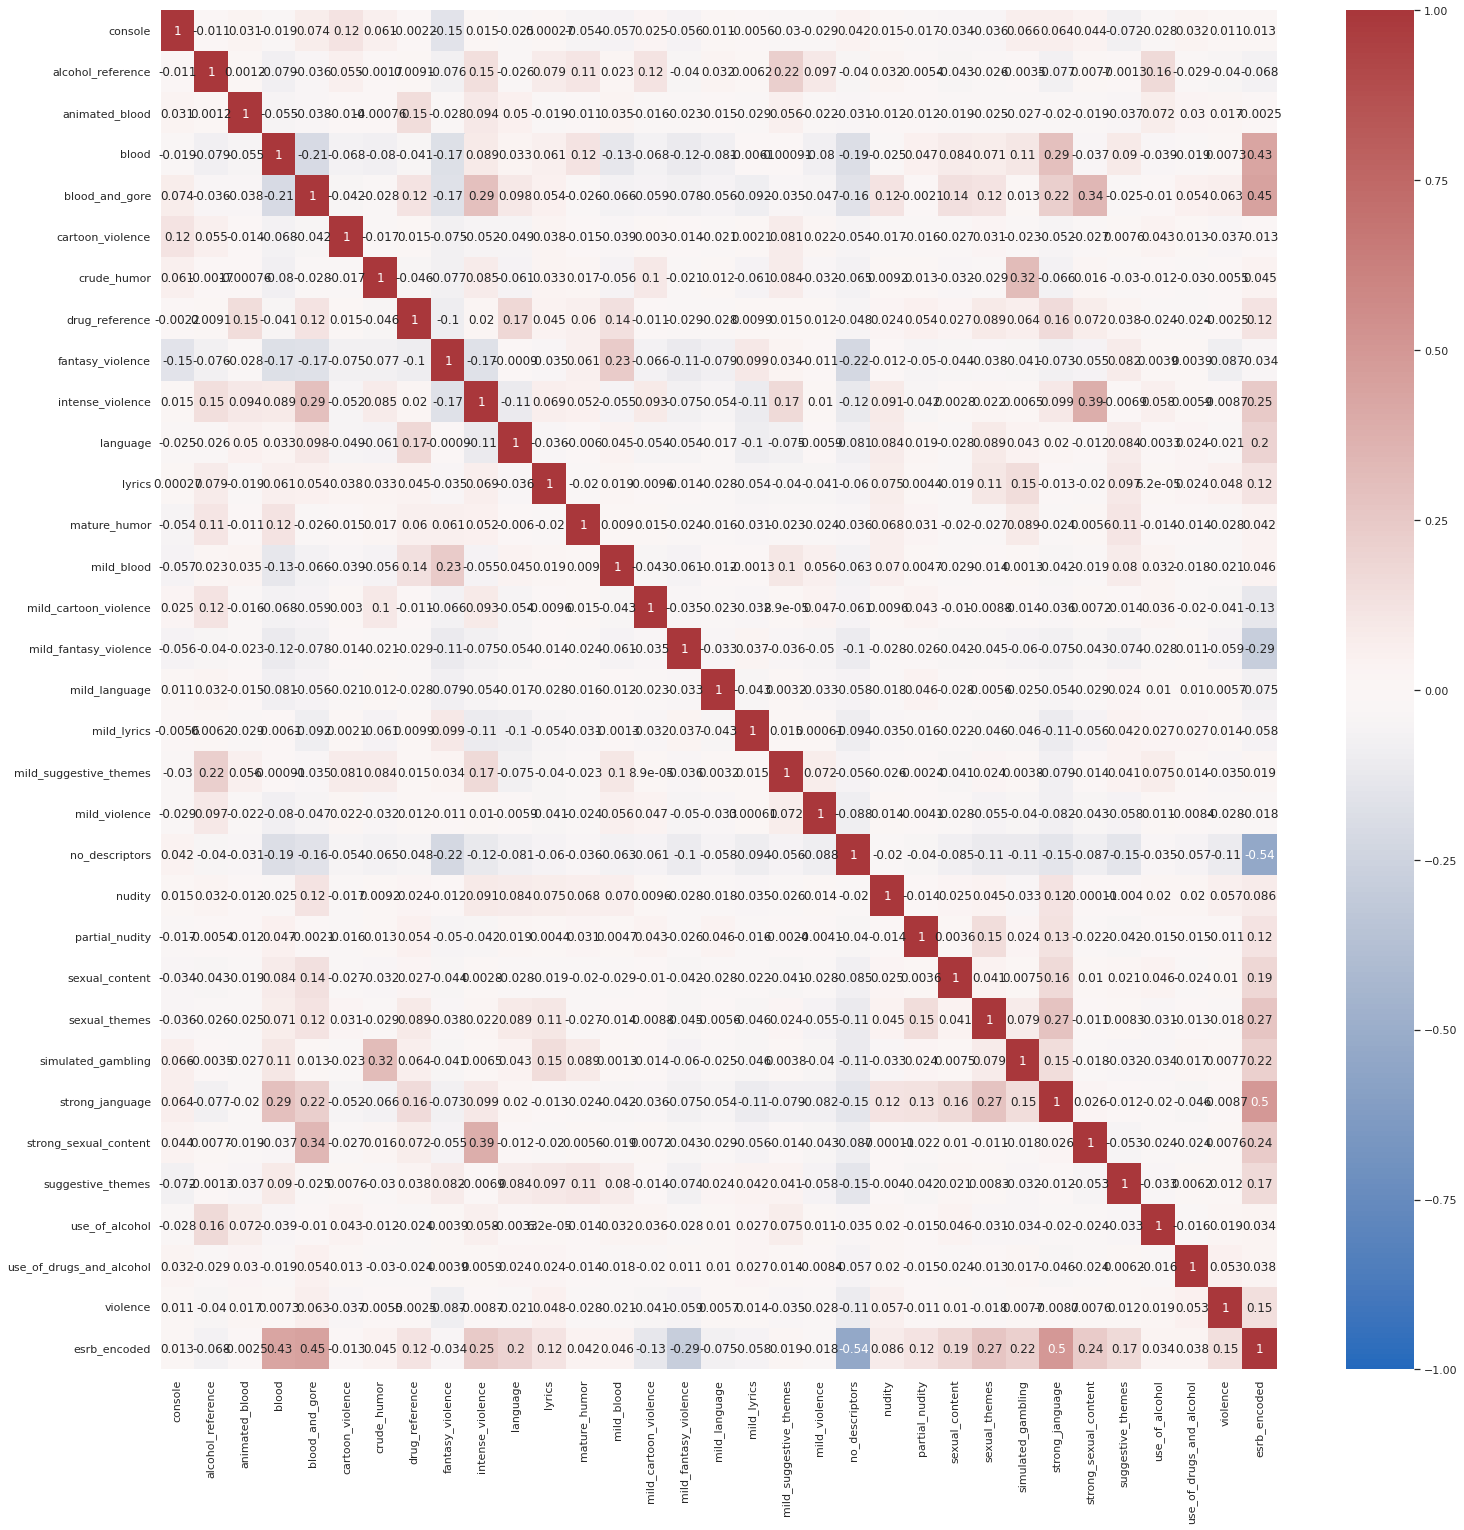

In [ ]:


plt.figure(figsize=(25, 25))

sns.heatmap(df.corr(), cmap="vlag", vmin=-1, vmax=1, annot= True)

We can see that blood, strong laguage and blood and gore are positively correlated with a higher esrb rating

We can also see that no descriptors and mild fantasy violence are correlated with a lower esrb rating

Lots of visualisation can be done by making slices of the different ratings using groupby and seeing what categories are most common in the different ratings

In [ ]:
selected_features = list(df.columns)

In [ ]:
selected_features

['title',
 'console',
 'alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_janguage',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence',
 'esrb_rating',
 'esrb_encoded']

In [ ]:
selected_features.remove("title")
selected_features.remove("esrb_rating")
selected_features.remove("esrb_rating")



# cosole can also probably be removed

In [ ]:
selected_features

['console',
 'alcohol_reference',
 'animated_blood',
 'blood',
 'blood_and_gore',
 'cartoon_violence',
 'crude_humor',
 'drug_reference',
 'fantasy_violence',
 'intense_violence',
 'language',
 'lyrics',
 'mature_humor',
 'mild_blood',
 'mild_cartoon_violence',
 'mild_fantasy_violence',
 'mild_language',
 'mild_lyrics',
 'mild_suggestive_themes',
 'mild_violence',
 'no_descriptors',
 'nudity',
 'partial_nudity',
 'sexual_content',
 'sexual_themes',
 'simulated_gambling',
 'strong_janguage',
 'strong_sexual_content',
 'suggestive_themes',
 'use_of_alcohol',
 'use_of_drugs_and_alcohol',
 'violence']

In [ ]:
X = df[selected_features]

y = df["esrb_rating"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

Going to split the current dataset for now instead of using the test data

In [ ]:
print("Lenght of our Training data:", y_train.shape[0], "\nLength of our Testing data:", y_test.shape[0])

Lenght of our Training data: 1516 
Length of our Testing data: 379


First will try a normal decision tree and then a random forest

These seem like the best classifiers to use

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

#precision = precision_score(y_true=y_test, y_pred=y_pred)
#print("Precision Score: %f" % precision)

#recall = recall_score(y_true=y_test, y_pred=y_pred)
#print("Recall Score: %f" % recall)

#f1 = f1_score(y_true=y_test, y_pred=y_pred)
#print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
#auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
#print('AUC Score: %f' % auc)

Accuracy Score: 0.860158


Need different metrics for a multiclass classifier

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.96      0.97      0.96        91
          ET       0.77      0.79      0.78        80
           M       0.91      0.88      0.90        78
           T       0.82      0.82      0.82       130

    accuracy                           0.86       379
   macro avg       0.86      0.86      0.86       379
weighted avg       0.86      0.86      0.86       379



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[ 88   3   0   0]
 [  3  63   0  14]
 [  0   0  69   9]
 [  1  16   7 106]]


Would be nice if it was labeled

Not exactly sure what the order of the class names should be

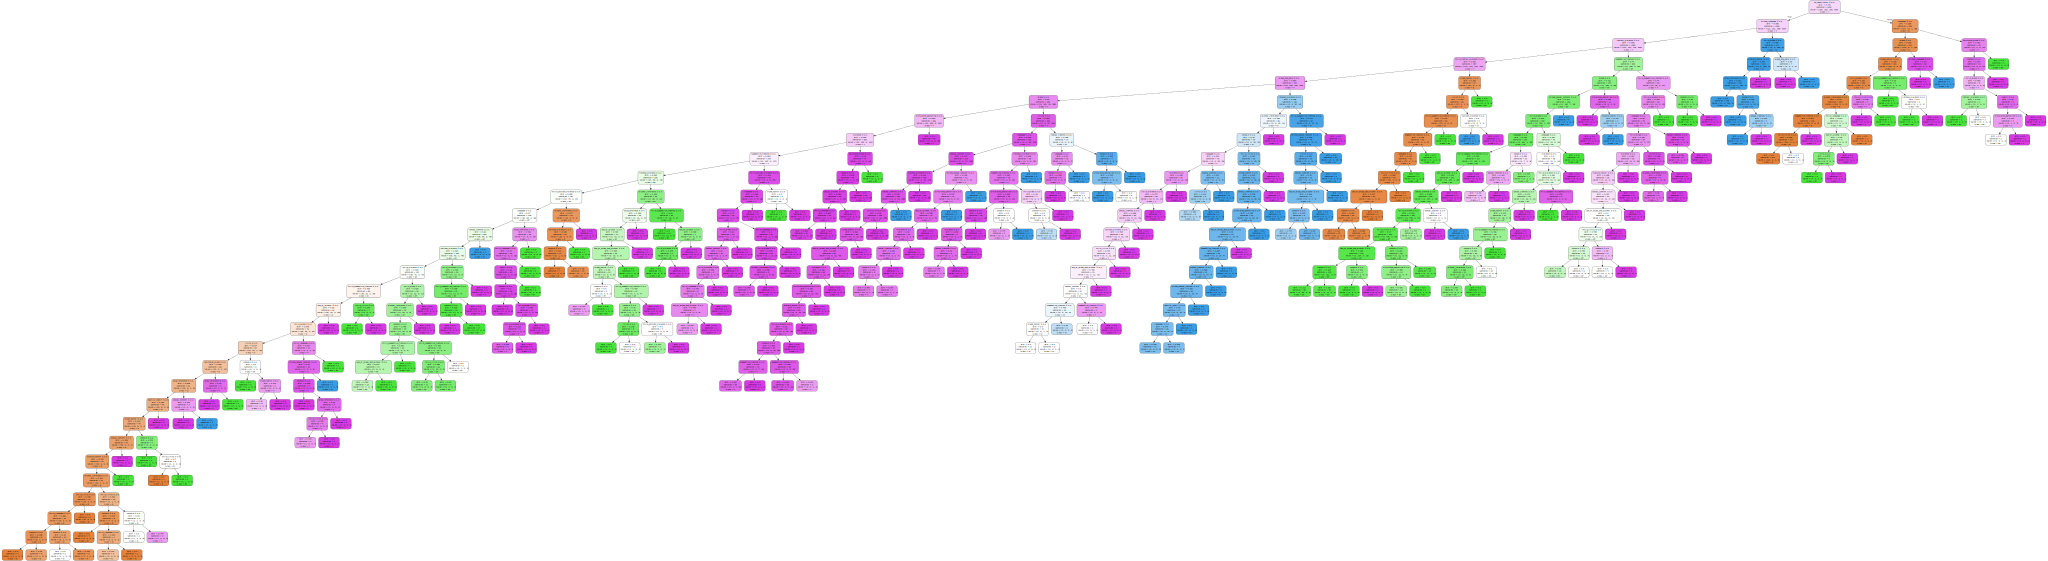

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None,
                     feature_names=selected_features,
                     class_names=["E", "ET", "M", "T"],
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)

graph

Could try tuning the parameters

In [ ]:
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
20,0.168379,no_descriptors
26,0.158017,strong_janguage
8,0.081976,fantasy_violence
4,0.064383,blood_and_gore
15,0.062495,mild_fantasy_violence
3,0.057909,blood
28,0.043409,suggestive_themes
10,0.040057,language
18,0.024308,mild_suggestive_themes
13,0.023009,mild_blood


In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           E       0.95      0.96      0.95        91
          ET       0.75      0.82      0.79        80
           M       0.93      0.85      0.89        78
           T       0.82      0.81      0.81       130

    accuracy                           0.85       379
   macro avg       0.86      0.86      0.86       379
weighted avg       0.86      0.85      0.86       379



In [ ]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[ 87   4   0   0]
 [  2  66   0  12]
 [  1   0  66  11]
 [  2  18   5 105]]


Not much improvement from the regualr decision tree

Maybe would be better with tuning